In [154]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import svm
from sklearn.ensemble import BaggingClassifier

In [2]:
RANDOM_SEED = 42

In [3]:
path_photos = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/JPEGImages/"
path_txt = "C:/Users/Maria/Desktop/CV/Assignment 2/VOCdevkit/VOC2012/ImageSets/Main/"
all_photos = os.listdir(path_photos)
all_txt = os.listdir(path_txt)

In [4]:
print(all_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bicycle_train.txt', 'bicycle_trainval.txt', 'bicycle_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'boat_train.txt', 'boat_trainval.txt', 'boat_val.txt', 'bottle_train.txt', 'bottle_trainval.txt', 'bottle_val.txt', 'bus_train.txt', 'bus_trainval.txt', 'bus_val.txt', 'car_train.txt', 'car_trainval.txt', 'car_val.txt', 'cat_train.txt', 'cat_trainval.txt', 'cat_val.txt', 'chair_train.txt', 'chair_trainval.txt', 'chair_val.txt', 'cow_train.txt', 'cow_trainval.txt', 'cow_val.txt', 'diningtable_train.txt', 'diningtable_trainval.txt', 'diningtable_val.txt', 'dog_train.txt', 'dog_trainval.txt', 'dog_val.txt', 'horse_train.txt', 'horse_trainval.txt', 'horse_val.txt', 'motorbike_train.txt', 'motorbike_trainval.txt', 'motorbike_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'pottedplant_train.txt', 'pottedplant_trainval.txt', 'pottedplant_val.txt', 'sheep_train.txt', 'sheep_trainval.

In [5]:
keywords = ("bird", "person", "aeroplane", "sofa")
new_txt = [file_name for file_name in all_txt for key in keywords if key in file_name]
print(new_txt)

['aeroplane_train.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'bird_train.txt', 'bird_trainval.txt', 'bird_val.txt', 'person_train.txt', 'person_trainval.txt', 'person_val.txt', 'sofa_train.txt', 'sofa_trainval.txt', 'sofa_val.txt']


In [6]:
new_txt_train = [file_name for file_name in new_txt if "trainval" in file_name]
print(new_txt_train)

['aeroplane_trainval.txt', 'bird_trainval.txt', 'person_trainval.txt', 'sofa_trainval.txt']


In [150]:
classes = {}
Data = pd.DataFrame()
for file_name in new_txt_train:
    list_images = []
    with open(path_txt + file_name, "r") as file:
        for line in file:
            l = line.split()
            if l[1] == str(1):
                list_images.append(l[0] + ".jpg")
    classes[file_name[:-4]] = np.array(list_images)
    Data = pd.concat([Data, pd.DataFrame([list_images, [file_name[:-13] for i in list_images]]).T])
    
Data.rename(columns = {0:"Image", 1:"Class"}, inplace = True); Data

,Image,Class
0,2008_000021.jpg,aeroplane
1,2008_000033.jpg,aeroplane
2,2008_000037.jpg,aeroplane
3,2008_000064.jpg,aeroplane
4,2008_000151.jpg,aeroplane
...,...,...
502,2011_003182.jpg,sofa
503,2011_003188.jpg,sofa
504,2011_003201.jpg,sofa
505,2011_003212.jpg,sofa


In [8]:
images_arrays = [cv.imread(path_photos + Data["Image"].iloc[i], cv.IMREAD_COLOR) for i in range(len(Data.index))]
Data["Array"] = images_arrays

In [9]:
Data.head()

,Image,Class,Array
0,2008_000021.jpg,aeroplane,"[[[179, 136, 93], [179, 136, 93], [179, 136, 9..."
1,2008_000033.jpg,aeroplane,"[[[209, 98, 0], [210, 99, 1], [211, 100, 2], [..."
2,2008_000037.jpg,aeroplane,"[[[180, 142, 108], [178, 140, 106], [178, 140,..."
3,2008_000064.jpg,aeroplane,"[[[197, 152, 101], [197, 152, 101], [197, 152,..."
4,2008_000151.jpg,aeroplane,"[[[167, 158, 161], [167, 159, 160], [167, 161,..."


In [10]:
X = pd.DataFrame(Data["Array"])
y = np.array(Data["Class"]).reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [12]:
X_train.head()

,Array
687,"[[[212, 229, 248], [202, 221, 242], [196, 216,..."
3555,"[[[12, 9, 5], [17, 18, 9], [1, 3, 3], [1, 6, 5..."
156,"[[[57, 50, 71], [66, 51, 78], [54, 49, 70], [4..."
1918,"[[[1, 5, 0], [3, 6, 4], [7, 10, 8], [6, 9, 7],..."
2621,"[[[252, 237, 235], [254, 239, 237], [250, 234,..."


## Using ORB

In [111]:
sift = cv.SIFT_create()
t = time.time()
for i, img in enumerate (X_train.values):
    if i%25 == 0: print(i/len(X_train.values))
    
    kp, des = sift.detectAndCompute(img[0], None)

    if i == 0:
        all_des = des
    else:
        if (len(np.shape(des))) > 1:
            all_des = np.vstack([all_des, des])

print(time.time()-t)

0.0
0.005183495749533485
0.01036699149906697
0.015550487248600456
0.02073398299813394
0.025917478747667425
0.031100974497200912
0.036284470246734396
0.04146796599626788
0.04665146174580137
0.05183495749533485
0.05701845324486834
0.062201948994401825
0.0673854447439353
0.07256894049346879
0.07775243624300228
0.08293593199253577
0.08811942774206925
0.09330292349160274
0.09848641924113623
0.1036699149906697
0.10885341074020319
0.11403690648973668
0.11922040223927016
0.12440389798880365
0.12958739373833714
0.1347708894878706
0.1399543852374041
0.14513788098693758
0.15032137673647109
0.15550487248600456
0.16068836823553806
0.16587186398507153
0.171055359734605
0.1762388554841385
0.18142235123367198
0.18660584698320548
0.19178934273273895
0.19697283848227246
0.20215633423180593
0.2073398299813394
0.2125233257308729
0.21770682148040638
0.22289031722993988
0.22807381297947335
0.23325730872900685
0.23844080447854032
0.24362430022807383
0.2488077959776073
0.2539912917271408
0.2591747874766743
0.

In [113]:
t = time.time()
n_features = 100
kmeans = KMeans(n_clusters=n_features, random_state=0)
print("Time Training:", time.time()-t)

t = time.time()
kmeans.fit(all_des)
print("Time Fitting:", time.time()-t)

Time Training: 0.00029206275939941406
Time Fitting: 3347.2176747322083


In [115]:
def generate_histogram(img, kmeans, detector):
    kp, des = detector.detectAndCompute(img, None)
    
    list_hist = kmeans.predict(des)
    hist = np.zeros(n_features)
    for i in range(n_features):
        hist[i] = (list_hist==i).sum()
    hist = hist/hist.sum()
    return hist

In [116]:
def convert_images(df):
    t = time.time()
    df_hist = pd.DataFrame()
    for i, img in enumerate(df.values):
        if ((i/len(df.values)%0.1) < 0.001): print(i/len(df.values))
        if len(df_hist.values) == 0:
            df_hist = pd.DataFrame(generate_histogram(img[0], kmeans, sift).reshape(1, -1))
        else:
            df_hist = pd.concat((pd.DataFrame(generate_histogram(img[0], kmeans, sift).reshape(1, -1)), df_hist))

    print("Time Generating Histograms:", time.time() - t)
    return df_hist

In [168]:
def score(dict_scores, X, y_true, clf, name_clasifier):
    y_pred = clf.predict(X)
    F1 = sklearn.metrics.f1_score(y_true, y_pred, average='micro')
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='micro')
    precision = sklearn.metrics.precision_score(y_true, y_pred, average='micro')
    balanced_accuraccy = sklearn.metrics.balanced_accuracy_score(y_true, y_pred)
    accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
    dict_scores[name_clasifier] = {"f1":F1, "recall":recall, "precision":precision, "balanced_accuraccy":balanced_accuraccy, "accuracy":accuracy}
    print(dict_scores[name_clasifier])

In [117]:
X_train_hist = convert_images(X_train)

0.0
0.00020733982998133942
0.00041467965996267884
0.0006220194899440182
0.0008293593199253577
0.10014513788098693
0.10035247771096828
0.10055981754094961
0.10076715737093096
0.1009744972009123
0.20008293593199253
0.20029027576197386
0.20049761559195522
0.20070495542193656
0.2009122952519179
0.3000207339829981
0.30022807381297945
0.30043541364296084
0.30064275347294217
0.3008500933029235
0.40016587186398506
0.4003732116939664
0.4005805515239477
0.4007878913539291
0.40099523118391045
0.5001036699149907
0.500311009744972
0.5005183495749533
0.5007256894049347
0.500933029234916
0.6000414679659962
0.6002488077959776
0.6004561476259589
0.6006634874559403
0.6008708272859217
0.7001866058469832
0.7003939456769646
0.7006012855069459
0.7008086253369272
0.8001244038979888
0.8003317437279701
0.8005390835579514
0.8007464233879328
0.8009537632179141
0.9000622019489944
0.9002695417789758
0.9004768816089571
0.9006842214389384
0.9008915612689198
Time Generating Histograms: 519.3322298526764


In [118]:
X_train_hist

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.007212,0.007212,0.031250,0.016827,0.002404,0.016827,0.019231,0.028846,0.026442,0.009615,...,0.014423,0.007212,0.000000,0.004808,0.019231,0.004808,0.009615,0.012019,0.033654,0.040865
0,0.001582,0.017405,0.017405,0.009494,0.001582,0.001582,0.006329,0.020570,0.003165,0.004747,...,0.006329,0.015823,0.004747,0.012658,0.007911,0.014241,0.022152,0.006329,0.009494,0.003165
0,0.016054,0.009365,0.012040,0.003344,0.012040,0.008696,0.006020,0.012040,0.008696,0.012040,...,0.002676,0.003344,0.011371,0.013378,0.010033,0.004682,0.005351,0.006689,0.008027,0.010033
0,0.005495,0.005495,0.024725,0.013736,0.005495,0.016484,0.010989,0.010989,0.005495,0.008242,...,0.024725,0.021978,0.000000,0.008242,0.010989,0.005495,0.016484,0.008242,0.005495,0.032967
0,0.011194,0.020522,0.003731,0.011194,0.005597,0.016791,0.018657,0.007463,0.020522,0.014925,...,0.011194,0.007463,0.013060,0.011194,0.003731,0.005597,0.007463,0.013060,0.005597,0.009328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.004405,0.006608,0.018722,0.005507,0.006608,0.014317,0.020925,0.011013,0.014317,0.004405,...,0.008811,0.007709,0.003304,0.005507,0.011013,0.002203,0.005507,0.006608,0.009912,0.007709
0,0.008596,0.004776,0.011461,0.016237,0.007641,0.005731,0.010506,0.009551,0.015282,0.010506,...,0.003820,0.005731,0.002865,0.021968,0.010506,0.009551,0.012416,0.012416,0.013372,0.010506
0,0.005988,0.002994,0.011976,0.011976,0.008982,0.005988,0.011976,0.014970,0.044910,0.008982,...,0.008982,0.000000,0.008982,0.002994,0.017964,0.005988,0.023952,0.005988,0.005988,0.008982
0,0.008993,0.005396,0.014388,0.008993,0.005396,0.012590,0.016187,0.012590,0.007194,0.003597,...,0.003597,0.017986,0.003597,0.010791,0.014388,0.000000,0.005396,0.005396,0.007194,0.008993


In [119]:
X_test_hist = convert_images(X_test)

0.0
0.0008291873963515755
0.10033167495854063
0.20066334991708126
0.30016583747927034
0.3009950248756219
0.40049751243781095
0.5008291873963516
0.6003316749585407
0.7006633499170812
0.8001658374792703
0.8009950248756219
0.900497512437811
Time Generating Histograms: 133.11760234832764


In [129]:
t = time.time()
neigh = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 150))}
grid = GridSearchCV(neigh, params, cv=5, scoring="balanced_accuracy")
print("Time training:", time.time()-t)


t = time.time()
grid.fit(X_train_hist, np.ravel(y_train))
bestk = grid.best_estimator_
print("Best k:", grid.best_params_)
print("Time fitting:", time.time()-t)

Time training: 0.0004982948303222656
Best k: {'n_neighbors': 5}
Time fitting: 69.43713426589966


In [132]:
t = time.time()
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train_hist, y_train)
print("Train Accuracy:", neigh.score(X_train_hist, y_train))
print("Time scoring:", time.time()-t)
print()

t = time.time()
print("Train Accuracy:", neigh.score(X_test_hist, y_test))
print("Time scoring:", time.time()-t)

C:\Users\Maria\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.6976985278872071
Time scoring: 0.16292858123779297

Train Accuracy: 0.5638474295190713
Time scoring: 0.07656049728393555


In [153]:
S = {}
score(S, X_test_hist, y_test, neigh, "KNN")
S

{'KNN': {'f1': 0.5638474295190713,
  'recall': 0.5638474295190713,
  'precision': 0.5638474295190713,
  'balanced_accuraccy': 0.2314008232543538,
  'accuracy': 0.5638474295190713}}

In [147]:
t = time.time()
y_pred = neigh.predict(X_train_hist)
print("Time predicting:", time.time()-t)

cm = confusion_matrix(y_train, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

Time predicting: 0.2173919677734375


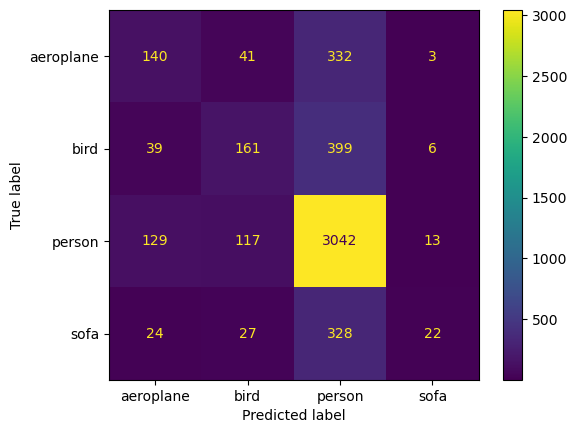

In [148]:
disp.plot()
plt.show()

#### SVM

In [157]:
t = time.time()
SVM_rbf = svm.SVC(kernel='rbf', class_weight="balanced")
parameters = {'C':[0.1, 1, 10], "gamma":[0.01, 0.1, 1]}
grid = GridSearchCV(SVM_rbf, parameters, scoring="balanced_accuracy")
grid.fit(X_train_hist, np.ravel(y_train))
best_SVM_rbf = grid.best_estimator_
print("Time training:", time.time()-t)

Time training: 214.113210439682


In [158]:
score(S, X_test_hist, y_test, best_SVM_rbf, "SVM")
S

{'KNN': {'f1': 0.5638474295190713,
  'recall': 0.5638474295190713,
  'precision': 0.5638474295190713,
  'balanced_accuraccy': 0.2314008232543538,
  'accuracy': 0.5638474295190713},
 'SVM': {'f1': 0.12189054726368159,
  'recall': 0.12189054726368159,
  'precision': 0.12189054726368159,
  'balanced_accuraccy': 0.24384394876212173,
  'accuracy': 0.12189054726368159}}

In [159]:
t = time.time()
y_pred = best_SVM_rbf.predict(X_train_hist)
print("Time predicting:", time.time()-t)

cm = confusion_matrix(y_train, y_pred, labels=best_SVM_rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_SVM_rbf.classes_)

Time predicting: 2.3826730251312256


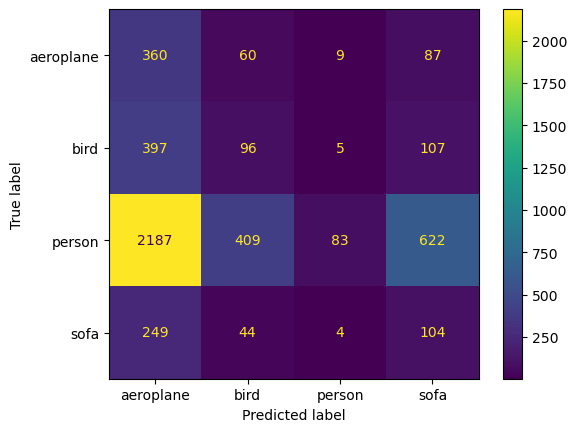

In [160]:
disp.plot()
plt.show()

In [178]:
bagg = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors = 5), random_state=42).fit(X_train_hist, np.ravel(y_train))

In [ ]:
parameters = {"n_estimators":range(1, 300)}
grid = GridSearchCV(bagg, parameters, scoring="balanced_accuracy")
grid.fit(X_train_hist, np.ravel(y_train))
best_SVM_rbf = grid.best_estimator_